In [2]:
! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-AU,en;q=0.9,zh-CN;q=0.8,zh;q=0.7,en-US;q=0.6,zh-TW;q=0.5" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/1474%2F2639%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1591799434&Signature=C4vMigYsX6XrnzNUI36pZXdRJP3Tm1irWSqZZjwWxrlTTxiWnwvRXaugtX8YamEoPo7OYR4Ao1QOFcaTZlqqUmaFWAsi27O9ZLL7nrzA46MeoWkUulOG4K%2BzHzaoOK%2F%2FjVlTfG7iWzaprDn2lqTsyvRV0Xk92GIsVO9erY9pi5qFhMPrtJfHt8%2FsUPknemvlg9k78ZcpD8H1RCh6bnXgTPJkoJRqwdT0oxQCffKqaFPbaprX5gK5z3vPggs1mBGOZHIiq4qfbBsYbHQzy029L2apxt4hJfZcly1jo6wI4p6LHYzNtftC1kXljzQII9gssRXxJlP3NgKSk95Xx8admg%3D%3D" -c -O '1474_2639_bundle_archive.zip'

--2020-06-09 13:36:27--  https://storage.googleapis.com/kaggle-data-sets/1474%2F2639%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1591799434&Signature=C4vMigYsX6XrnzNUI36pZXdRJP3Tm1irWSqZZjwWxrlTTxiWnwvRXaugtX8YamEoPo7OYR4Ao1QOFcaTZlqqUmaFWAsi27O9ZLL7nrzA46MeoWkUulOG4K%2BzHzaoOK%2F%2FjVlTfG7iWzaprDn2lqTsyvRV0Xk92GIsVO9erY9pi5qFhMPrtJfHt8%2FsUPknemvlg9k78ZcpD8H1RCh6bnXgTPJkoJRqwdT0oxQCffKqaFPbaprX5gK5z3vPggs1mBGOZHIiq4qfbBsYbHQzy029L2apxt4hJfZcly1jo6wI4p6LHYzNtftC1kXljzQII9gssRXxJlP3NgKSk95Xx8admg%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 2607:f8b0:400c:c15::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137366 (134K) [application/zip]
Saving to: ‘1474_2639_bundle_archive.zip’

1474_2639_bundle_ar 100%[===================>] 134.15K  --.-KB/s    in 0.001s  

2020-06-09 13:36:27 (91.1 MB/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
! unzip 1474_2639_bundle_archive.zip

Archive:  1474_2639_bundle_archive.zip
  inflating: IMDB-Movie-Data.csv     


In [0]:
df = pd.read_csv('IMDB-Movie-Data.csv')

In [6]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [7]:
df.info() # df.shape included

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# check missing values (split out as test data set)

In [0]:
def chk_ms_val(data):
  # prepare for plot the missing value
  percent_missing = data.isnull().sum() / len(data)
  percent_missing_df = pd.DataFrame({'percent_missing': percent_missing})
  percent_missing_df = percent_missing_df.sort_values(['percent_missing'], ascending = False).reset_index(drop=False)

  # define the style of the plot
  sns.set(style="whitegrid")
  
  # Initialize the matplotlib figure
  f, ax = plt.subplots(figsize=(6, 12))
  # Plot the total crashes
  sns.set_color_codes("pastel")
  sns.barplot(x="percent_missing", y="index", data=percent_missing_df,
              label="Total missing", color="b") 

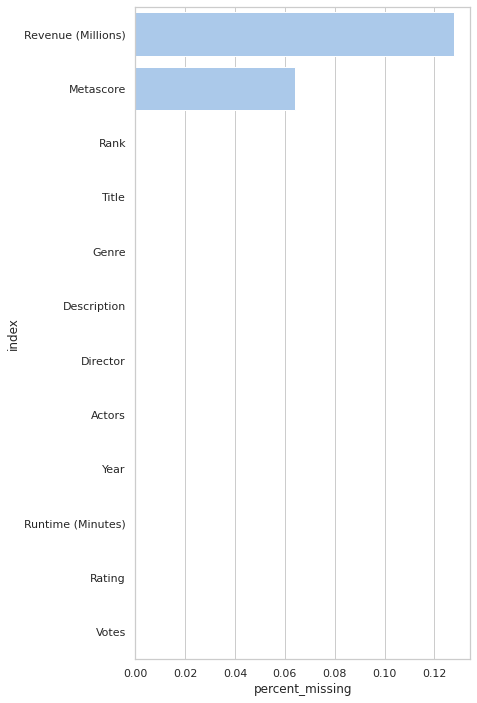

In [9]:
chk_ms_val(df)

'Revenue' column has 12% above missing value, should deal with it. Let's take a look at 'Revenue' 's distribution.

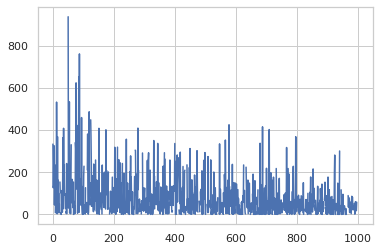

In [10]:
df['Revenue (Millions)'].plot()

OK, I have an idea, leave the missing data, set them as test data set. 

In [0]:
null_data = df[df.isnull().any(axis=1)]

In [12]:
null_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
22,23,Hounds of Love,"Crime,Drama,Horror",A cold-blooded predatory couple while cruising...,Ben Young,"Emma Booth, Ashleigh Cummings, Stephen Curry,S...",2016,108,6.7,1115,NaN,72.0
25,26,Paris pieds nus,Comedy,Fiona visits Paris for the first time to assis...,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2016,83,6.8,222,NaN,NaN
26,27,Bahubali: The Beginning,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,NaN
27,28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
988,989,Martyrs,Horror,A young woman's quest for revenge against the ...,Pascal Laugier,"Morjana Alaoui, Mylène Jampanoï, Catherine Bég...",2008,99,7.1,63785,NaN,89.0
989,990,Selma,"Biography,Drama,History",A chronicle of Martin Luther King's campaign t...,Ava DuVernay,"David Oyelowo, Carmen Ejogo, Tim Roth, Lorrain...",2014,128,7.5,67637,52.07,NaN
992,993,Take Me Home Tonight,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,NaN
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0


In [0]:
train_data = df.dropna()    # drop all rows with missing values.

In [14]:
train_data.shape

(838, 12)

Now 'train_data' is a complete data set.

# EDA

In [15]:
train_data.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


**Rating VS Metascore**

---


SO, first, let's take a look at the relationship between 'Metascore' and 'Rating', because these two looks pretty similar to me. 

In [0]:
temp_RM = train_data.loc[:,('Rating', 'Metascore')]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


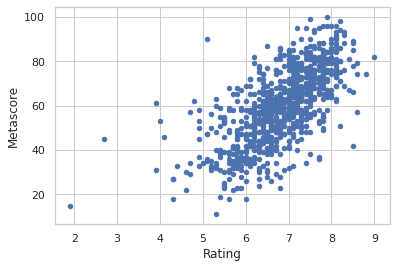

In [17]:
temp_RM.plot(x = 'Rating', y = 'Metascore', kind = 'scatter')

what would the correlation say?

In [18]:
temp_RM.corr()

,Rating,Metascore
Rating,1.000000,0.672731
Metascore,0.672731,1.000000


Ok, so not exactly high-related, put them both in the model then. However, I don't think professional reviewer (metascore) is not better then normal people(Rating)

**When did the movies were shot?**

---


In [0]:
temp_year = train_data.loc[:, 'Year']

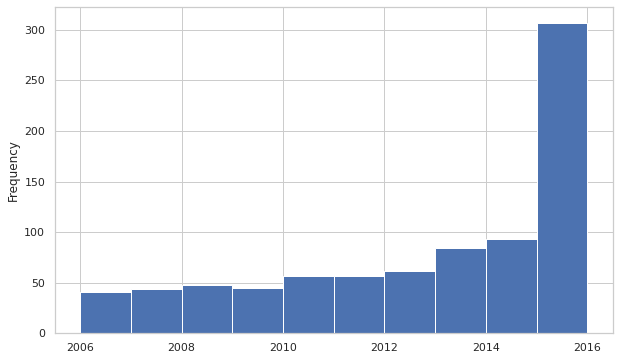

In [20]:
temp_year.plot(kind = 'hist', figsize=(10, 6))

from 2006 to 2015 movie industry grows very slow, 2016 has a outbreak. 

**Director and Actors** (Above 8)

---

Among Rating above 8, who is the director(s)? who are actors? Are there a combination of director and actors? What are in common of good movies?

In [0]:
temp_AbvEt = train_data[train_data["Rating"] >= 8]

In [22]:
temp_AbvEt.head(3)          # shape is (70, 12)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0


In [0]:
temp_AbvEt_DA = temp_AbvEt.loc[:, ('Title', 'Director', 'Actors')]

In [0]:
# Split the items into individules
temp_T = temp_AbvEt_DA['Actors'].str.split(",", n=10, expand = True)  # This is the common way to deal with multiple items in one cell.

In [0]:
temp_AbvEt_DA = pd.concat([temp_AbvEt_DA, temp_T], axis=1).rename(columns={0: 'Actor1',1: 'Actor2',2: 'Actor3',3: 'Actor4'}).drop('Actors', axis=1)

In [26]:
temp_AbvEt_DA         # Without missing values

,Title,Director,Actor1,Actor2,Actor3,Actor4
0,Guardians of the Galaxy,James Gunn,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana
6,La La Land,Damien Chazelle,Ryan Gosling,Emma Stone,Rosemarie DeWitt,J.K. Simmons
16,Hacksaw Ridge,Mel Gibson,Andrew Garfield,Sam Worthington,Luke Bracey,Teresa Palmer
18,Lion,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara,Sunny Pawar
19,Arrival,Denis Villeneuve,Amy Adams,Jeremy Renner,Forest Whitaker,Michael Stuhlbarg
...,...,...,...,...,...,...
713,Incendies,Denis Villeneuve,Lubna Azabal,Mélissa Désormeaux-Poulin,Maxim Gaudette,Mustafa Kamel
742,El secreto de sus ojos,Juan José Campanella,Ricardo Darín,Soledad Villamil,Pablo Rago,Carla Quevedo
765,PK,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt,Boman Irani
772,How to Train Your Dragon,Dean DeBlois,Jay Baruchel,Gerard Butler,Christopher Mintz-Plasse,Craig Ferguson


Who are the director(s) and actors of those good movies? # Don't think of combinatioins.

In [0]:
# define a function for profile of 'Director'
def showmethebest(data, column):
  pd.DataFrame(data[column].value_counts()).reset_index().plot(x='index', y=column, kind = 'bar', figsize=(12,8))

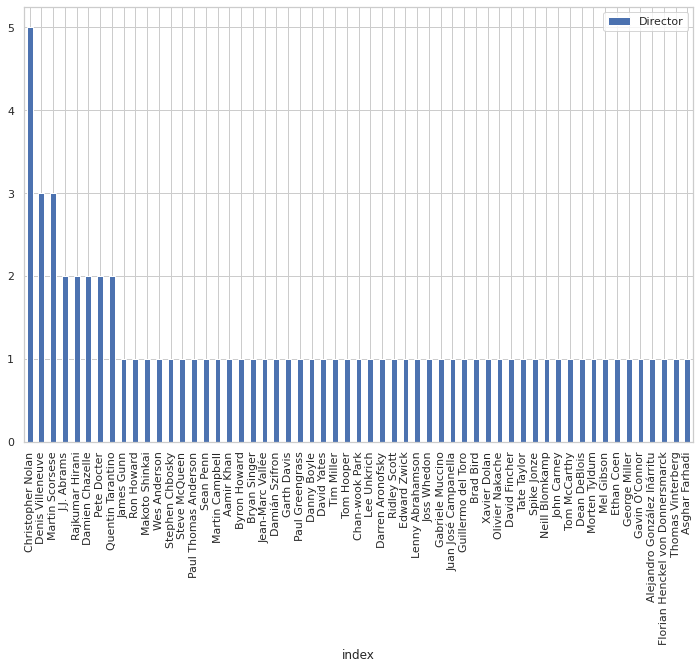

In [28]:
showmethebest(temp_AbvEt_DA, 'Director')

Ok, so 'Chrstopher Nolan' is the best director so far. 

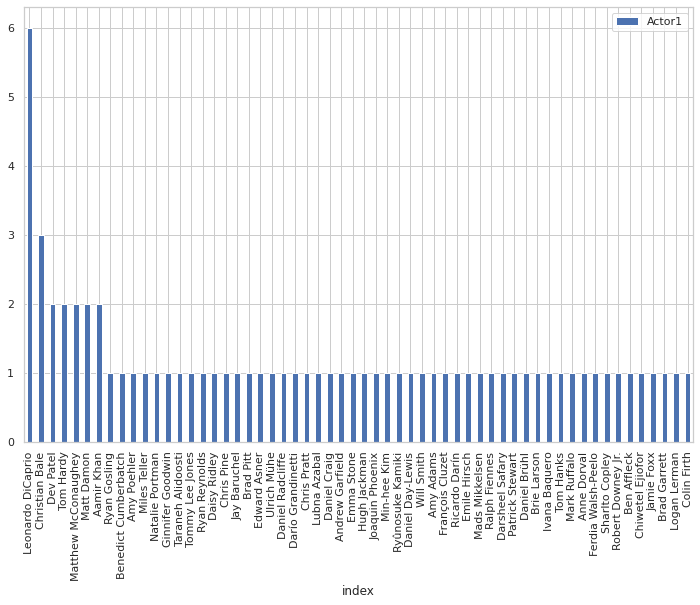

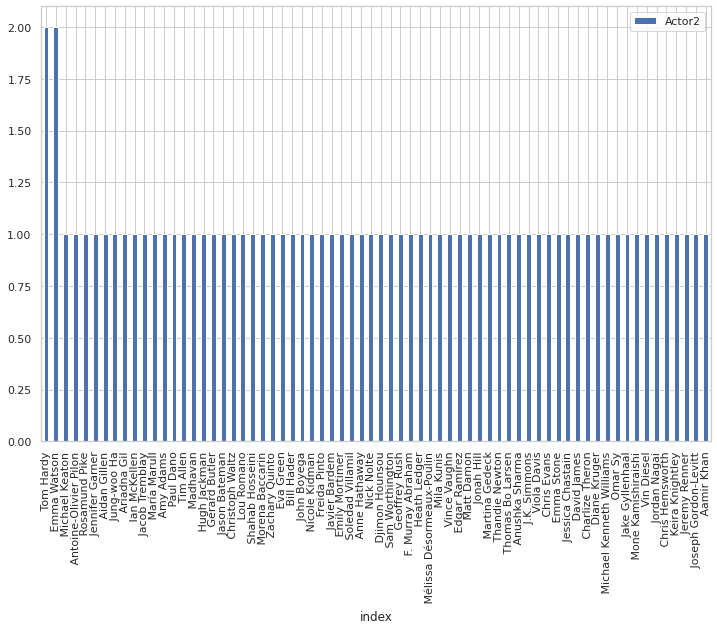

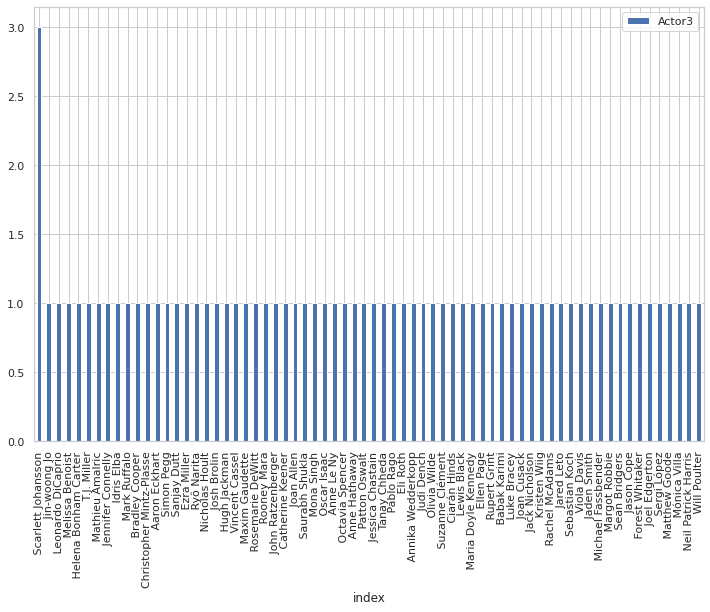

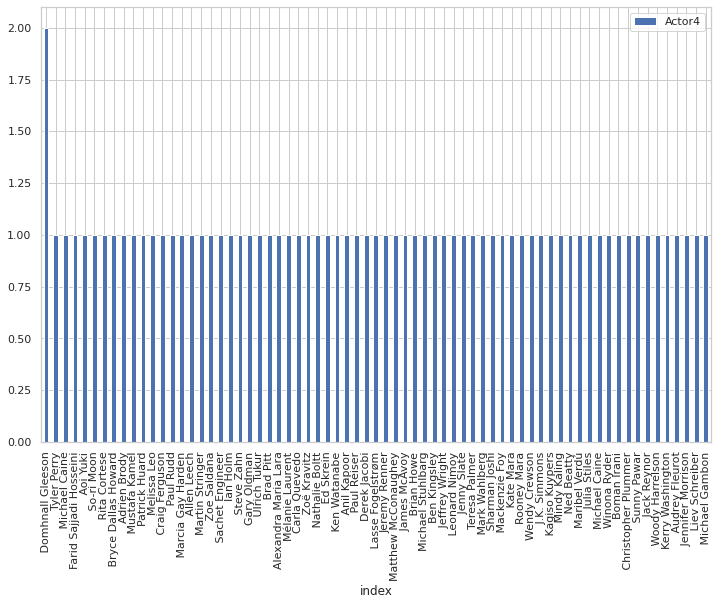

In [29]:
# use the same function on actor1 to actor4
for i in ['Actor1', 'Actor2', 'Actor3', 'Actor4']:
  showmethebest(temp_AbvEt_DA, i)                     # Yeah, works good. 

**Need Further revise** -- Mix all names and contrain into one plot

"""
IDEA: change the datafrome into Series, list of lists, iterate for each director, who are the actors based on movie. 
      For two Series, cross check the match part. 
""" -- waiting for later to think about.

**Genre vs Director** - Does the directors have a specities?


---



In [0]:
# split the original sub-data
temp_GD = train_data.loc[:,('Genre', 'Director')]
temp_T = temp_GD['Genre'].str.split(",", n=10, expand = True)
temp_GD = pd.concat([temp_GD, temp_T], axis=1).rename(columns={0: 'Genre1',1: 'Genre2',2: 'Genre3'}).drop('Genre', axis=1)

In [31]:
temp_GD.head()

,Director,Genre1,Genre2,Genre3
0,James Gunn,Action,Adventure,Sci-Fi
1,Ridley Scott,Adventure,Mystery,Sci-Fi
2,M. Night Shyamalan,Horror,Thriller,None
3,Christophe Lourdelet,Animation,Comedy,Family
4,David Ayer,Action,Adventure,Fantasy


In [0]:
# stack
yoyo = temp_GD.set_index('Director')
yoyo = yoyo.stack().reset_index().drop('level_1', axis=1)
yoyo.columns = ['Director', 'Genre']

# pivot
yoyo = yoyo.reset_index().groupby(["Director", "Genre"])["index"].count().reset_index(name='count')
New_temp_GD = yoyo.pivot(index='Director', columns='Genre',values='count')
New_temp_GD.fillna(0, inplace=True)

In [33]:
New_temp_GD.head()

Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Director,,,,,,,,,,,,,,,,,,,,
Aamir Khan,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abdellatif Kechiche,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Adam McKay,2.0,0.0,0.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Adam Shankman,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adam Wingard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [34]:
temp_GD.shape  # New_temp_GD.shape = 2190  # 838*3=2514       # Check there are no duplicates in the dataset

(838, 4)

**Visualisation**

Drawing a series of plots (20 plots). 

For each Genre of movie, who are the top 5 Directors. 

In [0]:
# ok, get the first 5
New_temp_GD = New_temp_GD.reset_index()

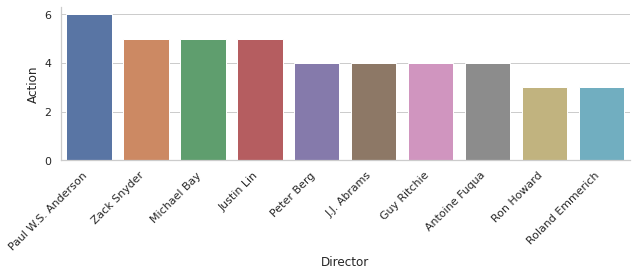

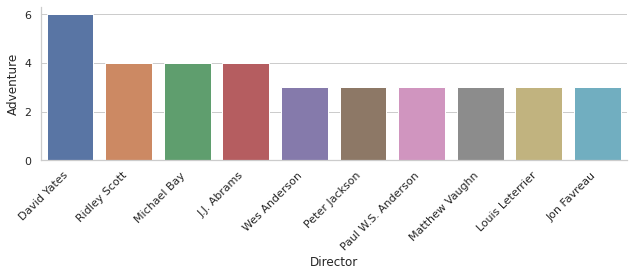

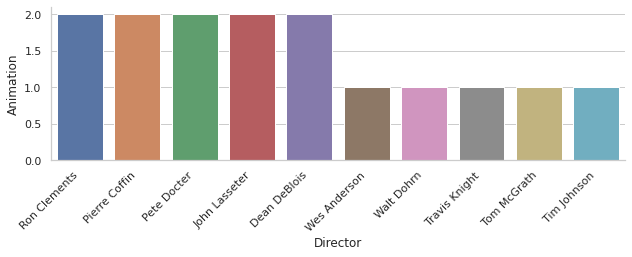

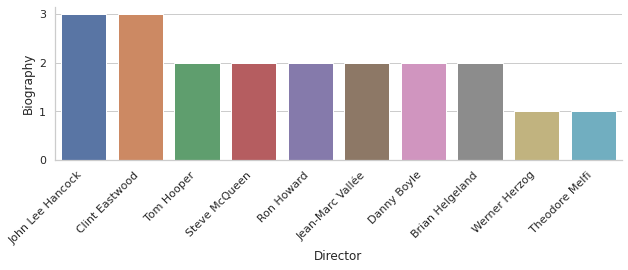

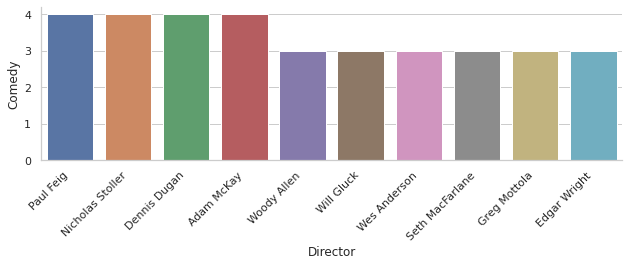

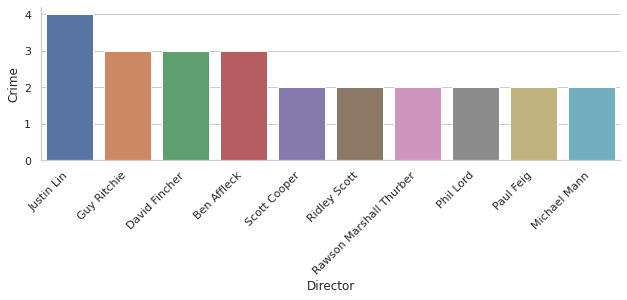

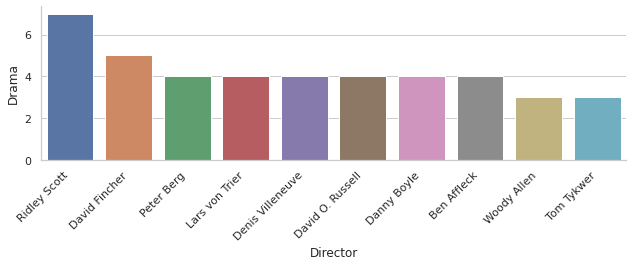

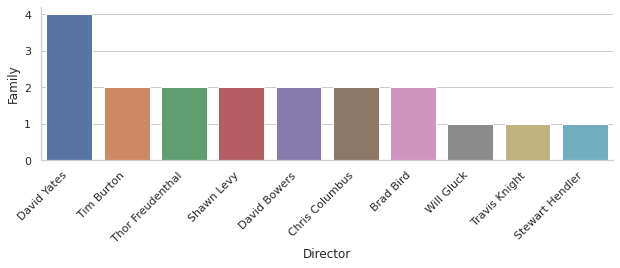

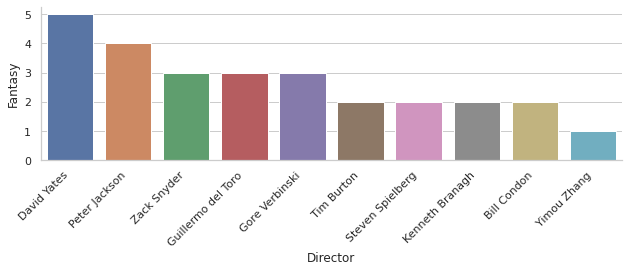

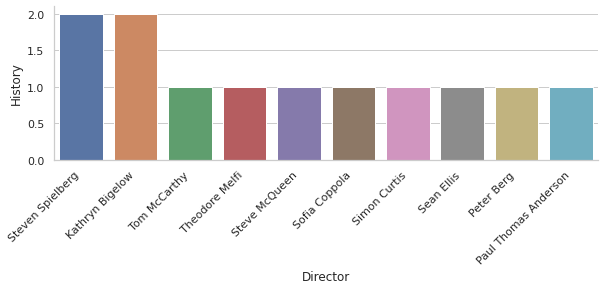

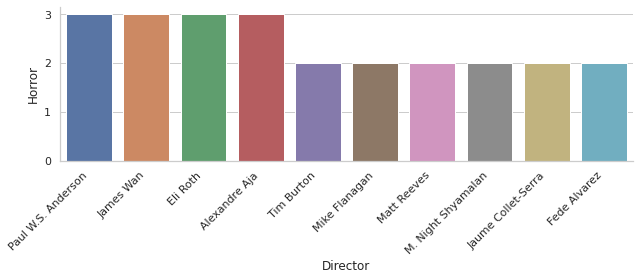

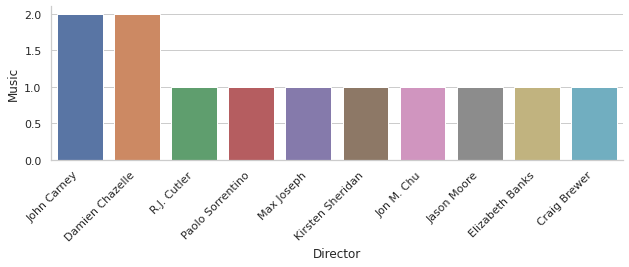

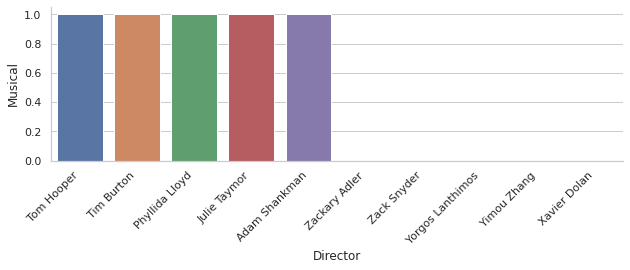

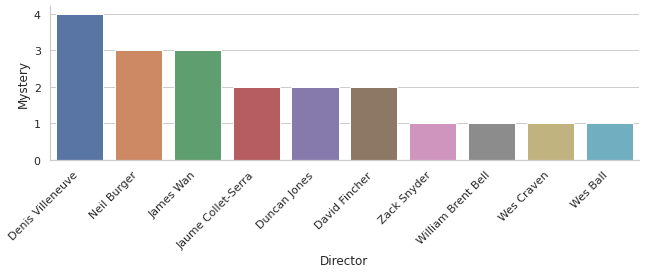

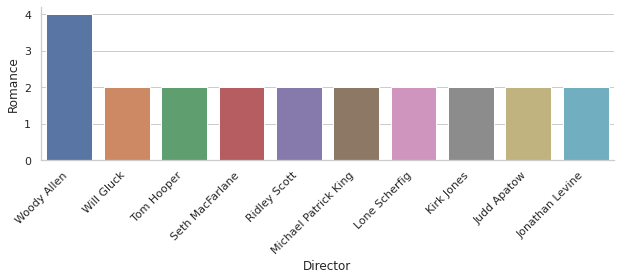

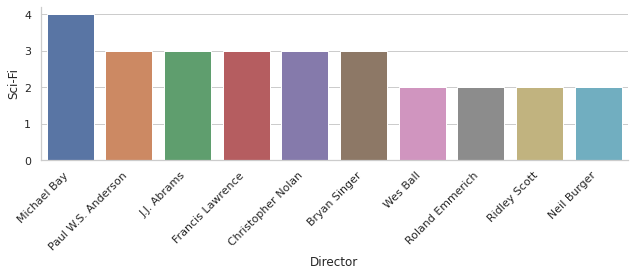

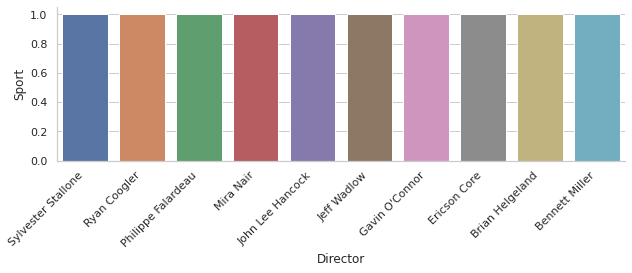

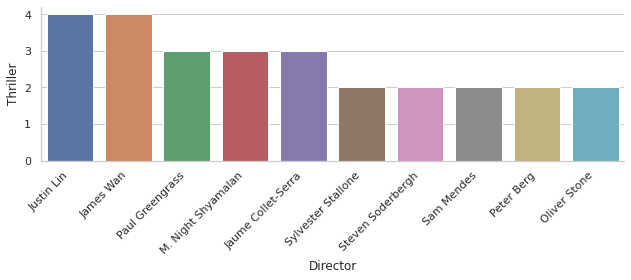

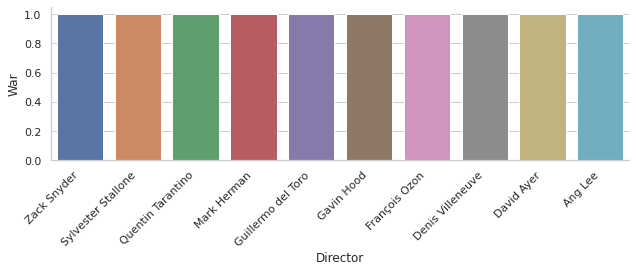

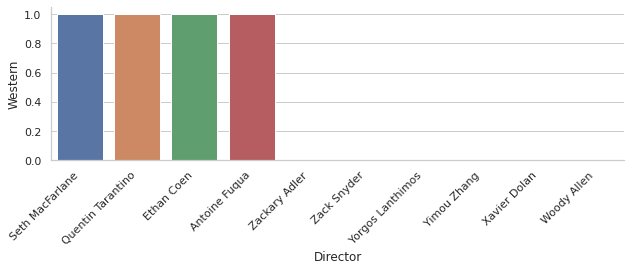

In [36]:
# Loop out the series plot to show 
for col in New_temp_GD.columns[1:21]:
  X = New_temp_GD['Director'].tolist()
  Y = New_temp_GD[col].apply(int).tolist()
  Z = [x for _,x in sorted(zip(Y,X))]

  kkkk = pd.DataFrame({'Director': Z[-10:][::-1], col : sorted(Y)[-10:][::-1] })

  act_plot = sns.catplot(x = 'Director', y = col, data=kkkk, height=3, aspect=3, kind = "bar")
  act_plot.set_xticklabels(rotation=45, horizontalalignment='right')

**Rating vs Revenue?**


---

Does high rating means high revenue?

In [37]:
train_data.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


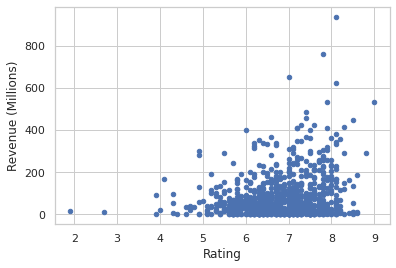

In [38]:
train_data.plot(x='Rating', y='Revenue (Millions)',kind = 'scatter')

In [39]:
temp_RtRv = train_data.loc[:,('Rating', 'Revenue (Millions)')]
temp_RtRv.head(3)

,Rating,Revenue (Millions)
0,8.1,333.13
1,7.0,126.46
2,7.3,138.12


In [40]:
temp_RtRv.corr()              # OK, no strong correlation at all. 

,Rating,Revenue (Millions)
Rating,1.000000,0.217106
Revenue (Millions),0.217106,1.000000


In [0]:
# Try out Fisher's test 

# OK, Leave it here for now, come back later. 

Two cloumn statistic test -- Come back and finish it!!!

https://www.graphpad.com/support/faqid/1790/

**Title vs Vote**

---



In [0]:
# get the subset data
temp_tv = train_data.loc[:, ('Title', 'Votes')]

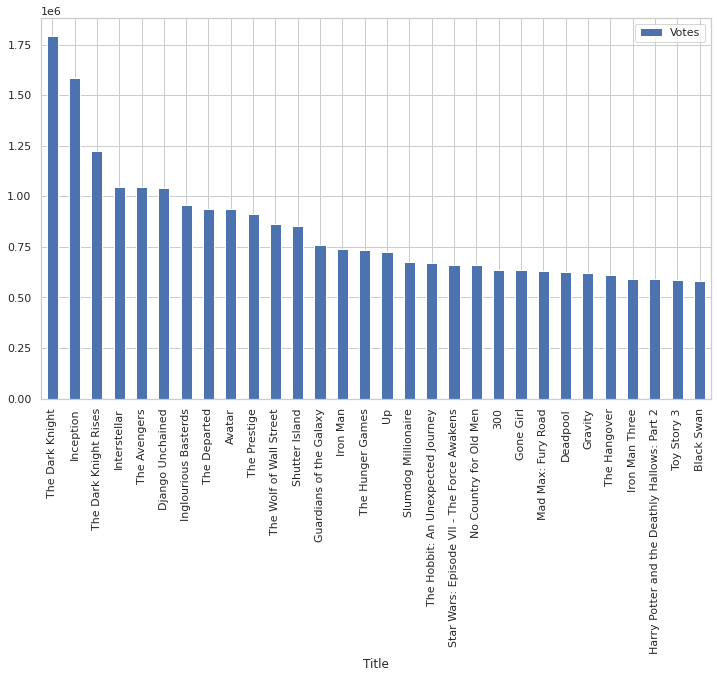

In [43]:
# plot, for the top 30 movies by votes
temp_tv.sort_values(by='Votes', ascending=False).nlargest(30, 'Votes', keep = 'all').plot(x = 'Title', y='Votes', kind='bar',figsize=(12,7))

**Title vs Rating**

---



In [0]:
temp_tr = train_data.loc[:, ('Title', 'Rating')]

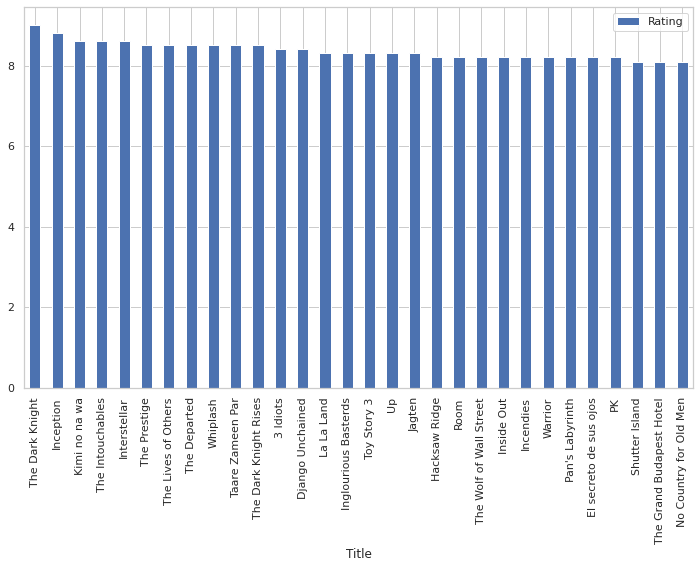

In [45]:
temp_tr.sort_values(by='Rating', ascending=False).nlargest(30, 'Rating', keep = 'last').plot(x = 'Title', y='Rating', kind='bar',figsize=(12,7))
# temp_tr.sort_values(by='Rating', ascending=False).nlargest(30, 'Rating', keep = 'all').plot(x = 'Title', y='Rating', kind='bar',figsize=(12,7))


# To be continued

# Just Backup Knowledges

In [46]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

arr.reshape(4,1,3)                                            # So, basically, the parameters inside reshape() function multiples needs to eaqual to np.shape, in this case 12.

array([[[ 1,  2,  3]],

       [[ 4,  5,  6]],

       [[ 7,  8,  9]],

       [[10, 11, 12]]])

In [47]:
'''
# Backup method for the pivoting the data

temp_GD = train_data.loc[:,('Genre', 'Director')]
temp_T = temp_GD['Genre'].str.split(",", n=10, expand = True)
temp_GD = pd.concat([temp_GD, temp_T], axis=1).rename(columns={0: 'Genre1',1: 'Genre2',2: 'Genre3'}).drop('Genre', axis=1)

def uNique(list1):                             # find unique value of a list.
    # define a empty list
    w = []
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    for x in unique_list: 
        w.append(x) 
    return w

list1 = list(temp_GD['Genre1'].unique()) + list(temp_GD['Genre2'].unique()) + list(temp_GD['Genre3'].unique())

unique_genres = uNique(list1)

for v in unique_genres:
   temp_GD[v] = temp_GD[['Genre1', 'Genre2', 'Genre3']].apply(lambda x: x.append(1), raw=False, axis=1) 

temp_GD.drop(columns={'Genre1', 'Genre2', 'Genre3'}, axis=1, inplace=True)

'''

'\n# Backup method for the pivoting the data\n\ntemp_GD = train_data.loc[:,(\'Genre\', \'Director\')]\ntemp_T = temp_GD[\'Genre\'].str.split(",", n=10, expand = True)\ntemp_GD = pd.concat([temp_GD, temp_T], axis=1).rename(columns={0: \'Genre1\',1: \'Genre2\',2: \'Genre3\'}).drop(\'Genre\', axis=1)\n\ndef uNique(list1):                             # find unique value of a list.\n    # define a empty list\n    w = []\n    # insert the list to the set \n    list_set = set(list1) \n    # convert the set to the list \n    unique_list = (list(list_set)) \n    for x in unique_list: \n        w.append(x) \n    return w\n\nlist1 = list(temp_GD[\'Genre1\'].unique()) + list(temp_GD[\'Genre2\'].unique()) + list(temp_GD[\'Genre3\'].unique())\n\nunique_genres = uNique(list1)\n\nfor v in unique_genres:\n   temp_GD[v] = temp_GD[[\'Genre1\', \'Genre2\', \'Genre3\']].apply(lambda x: x.append(1), raw=False, axis=1) \n\ntemp_GD.drop(columns={\'Genre1\', \'Genre2\', \'Genre3\'}, axis=1, inplace=True)\n\n'